# Install and load packages

In [1]:
install.packages("vioplot", repos='http://cran.us.r-project.org')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [2]:
library(vioplot)
library(forecast)

Loading required package: sm
Package 'sm', version 2.2-5.4: type help(sm) for summary information


# Analysis of interarrival time (IT) and length of stay (LOS) from Exhibit 3

In [3]:
admit.dsch.data <- read.csv("Admit_Dsch_Times.csv")
head(admit.dsch.data)

,ID,Admit_Dttm,Admit_Yr_Mo,Dsch.Release_Dttm,Dsch_Yr_Mo,LOS,Admit_Year,Dsch_Year,Interarrival_times
1,1,07/01/2007 07:13,200707,2007-08-27 10:37,200708,57.1,2007,2007,NA
2,2,07/02/2007 14:45,200707,2007-07-07 11:38,200707,4.9,2007,2007,1.313889
3,3,07/02/2007 17:14,200707,2007-07-21 12:48,200707,18.8,2007,2007,0.1034722
4,4,07/03/2007 00:08,200707,2007-07-07 16:22,200707,4.7,2007,2007,0.2875
5,5,07/04/2007 02:48,200707,2007-08-04 13:28,200708,31.4,2007,2007,1.111111
6,6,07/04/2007 03:27,200707,2007-07-20 11:15,200707,16.3,2007,2007,0.02708333


Partition data by year.

In [4]:
IT2007 <- admit.dsch.data$Interarrival_times[admit.dsch.data$Admit_Year==2007]
IT2008 <- admit.dsch.data$Interarrival_times[admit.dsch.data$Admit_Year==2008]
IT2009 <- admit.dsch.data$Interarrival_times[admit.dsch.data$Admit_Year==2009]
IT2010 <- admit.dsch.data$Interarrival_times[admit.dsch.data$Admit_Year==2010]
IT2011 <- admit.dsch.data$Interarrival_times[admit.dsch.data$Admit_Year==2011]
IT2012 <- admit.dsch.data$Interarrival_times[admit.dsch.data$Admit_Year==2012]
IT2013 <- admit.dsch.data$Interarrival_times[admit.dsch.data$Admit_Year==2013]

In [5]:
LOS2007 <- admit.dsch.data$LOS[admit.dsch.data$Dsch_Year==2007]
LOS2008 <- admit.dsch.data$LOS[admit.dsch.data$Dsch_Year==2008]
LOS2009 <- admit.dsch.data$LOS[admit.dsch.data$Dsch_Year==2009]
LOS2010 <- admit.dsch.data$LOS[admit.dsch.data$Dsch_Year==2010]
LOS2011 <- admit.dsch.data$LOS[admit.dsch.data$Dsch_Year==2011]
LOS2012 <- admit.dsch.data$LOS[admit.dsch.data$Dsch_Year==2012]
LOS2013 <- admit.dsch.data$LOS[admit.dsch.data$Dsch_Year==2013]

Examine summary statistics by year.

In [6]:
summary(IT2008)
summary(IT2012)
summary(LOS2008)
summary(LOS2012)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1493  0.4826  0.7082  1.0174  5.7583 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000694 0.200694 0.579167 0.775164 1.112500 4.940278 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.40   17.50   28.21   34.50  232.50 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.10    7.90   17.60   30.88   35.10  242.90 

Look at histograms.

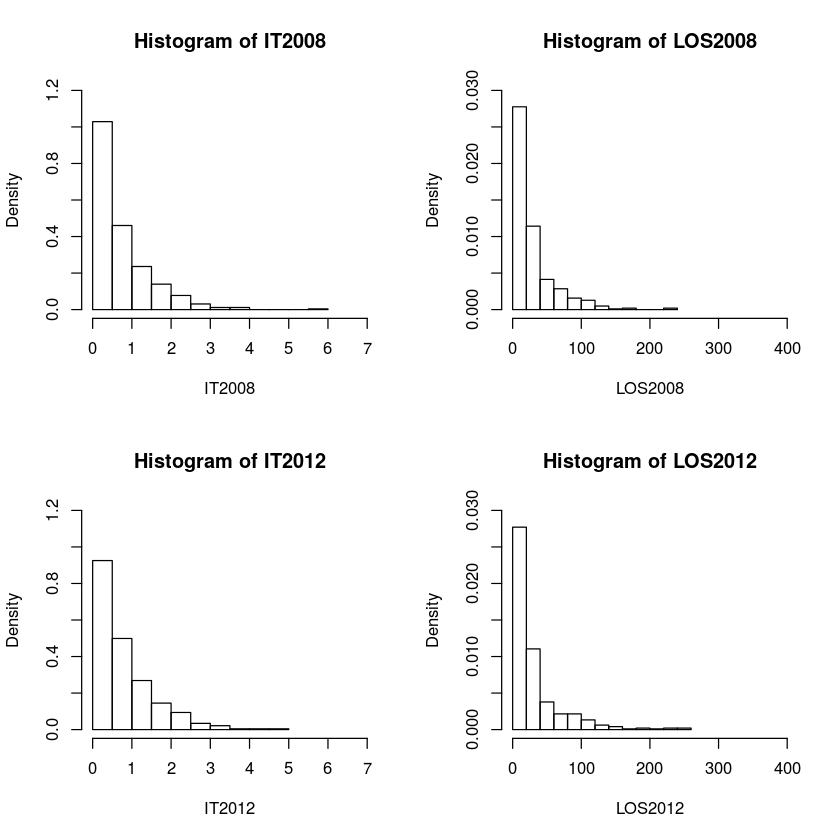

In [7]:
par(mfrow = c(2, 2))
hist(IT2008, xlim = c(0, 7), prob = TRUE, ylim = c(0, 1.2))
hist(LOS2008, xlim = c(0, 400), prob = TRUE, ylim = c(0, 0.03))
hist(IT2012, xlim = c(0, 7), prob = TRUE, ylim = c(0, 1.2))
hist(LOS2012, xlim = c(0, 400), prob = TRUE, ylim = c(0, 0.03))

Look at boxplots.

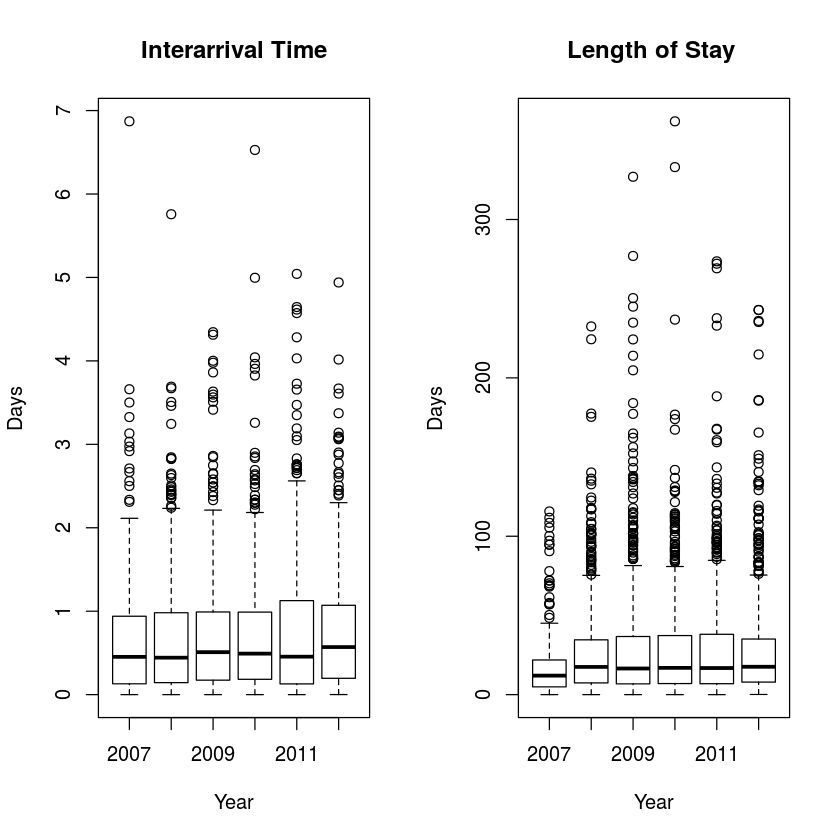

In [8]:
par(mfrow = c(1, 2))
boxplot(Interarrival_times ~ Dsch_Year, data = admit.dsch.data[admit.dsch.data$Dsch_Year != 2013, ], 
        xlab = "Year", ylab = "Days", main = "Interarrival Time")
boxplot(LOS ~ Dsch_Year, data = admit.dsch.data[admit.dsch.data$Dsch_Year != 2013, ], 
        xlab = "Year", ylab = "Days", main = "Length of Stay ")

Look at violin plots.

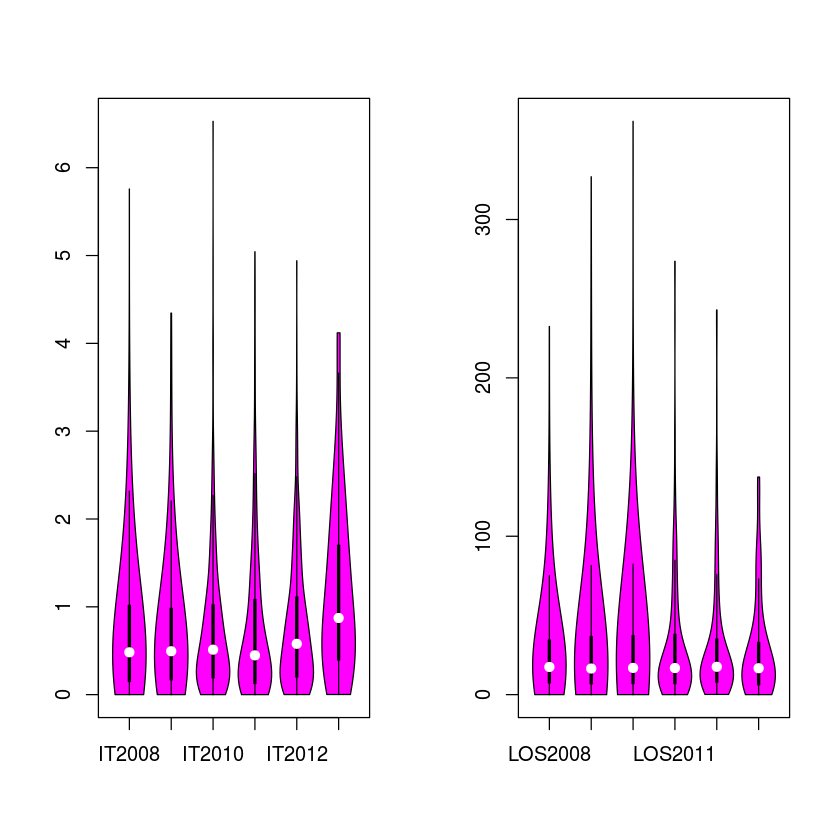

In [9]:
par(mfrow = c(1, 2))
vioplot(IT2008, IT2009, IT2010, IT2011, IT2012, IT2013, names = c("IT2008", "IT2009", "IT2010", "IT2011", "IT2012", "IT2013"))
vioplot(LOS2008, LOS2009, LOS2010, LOS2011, LOS2012, LOS2013, names = c("LOS2008", "LOS2009", "LOS2010", "LOS2011", "LOS2012", "LOS2013"))

Conduct a Kolmogorov-Smirnov test for the difference in two empirical distributions when the data come from continuous distributions. The null hypothesis is that the data came from the same continuous distribution. A low p-value suggests you should reject the null. Read about the test at http://www.physics.csbsju.edu/stats/KS-test.html. What is the statistic D in each test below? What does D tells us about the difference in the two distributions being compared?

Warning message:
In ks.test(IT2011, IT2012): p-value will be approximate in the presence of ties


	Two-sample Kolmogorov-Smirnov test

data:  IT2011 and IT2012
D = 0.08739, p-value = 0.05146
alternative hypothesis: two-sided


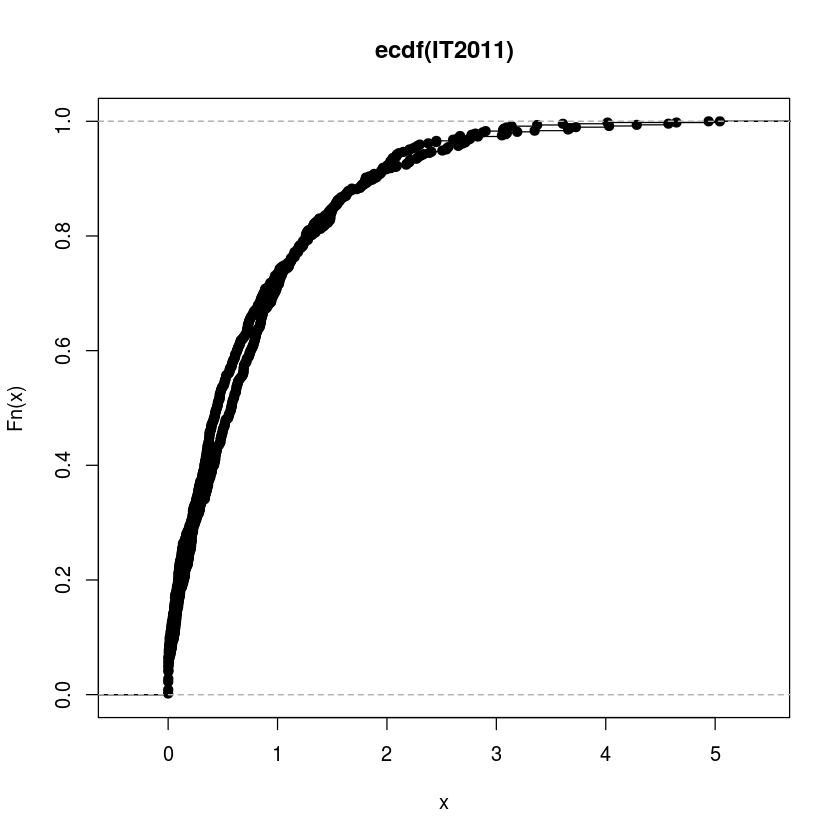

In [10]:
ks.test(IT2011,IT2012)
par(mfrow = c(1, 1))
plot(ecdf(IT2011))
lines(ecdf(IT2012))

# Analysis of gestational ages from Exhibit 4

In [11]:
gest.age <- read.csv("Gestational_Age.csv")
gest.age

,Weeks,X2008,X2009,X2010,X2011,X2012
1,Less than 23,0,4,1,1,0
2,23,8,5,6,8,9
3,24,18,10,11,17,15
4,25,13,17,16,7,13
5,26,14,22,13,13,6
6,27,12,17,13,19,9
7,28,17,15,10,29,18
8,29,24,18,22,14,18
9,30,20,13,17,17,21
10,31,27,23,26,22,24


Create a table of column percentages. See http://www.statmethods.net/stats/frequencies.html.

In [12]:
gest.age.matrix <- as.matrix(gest.age[ , 2:6])
dist.table <- round(prop.table(gest.age.matrix, 2), 4)
row.names(dist.table) <- gest.age$Weeks
colnames(dist.table) <- c(2008, 2009, 2010, 2011, 2012)
dist.table

,2008,2009,2010,2011,2012
Less than 23,0.0000,0.0070,0.0018,0.0018,0.0000
23,0.0131,0.0087,0.0106,0.0142,0.0161
24,0.0294,0.0174,0.0194,0.0302,0.0269
25,0.0212,0.0296,0.0282,0.0125,0.0233
26,0.0228,0.0383,0.0229,0.0231,0.0108
27,0.0196,0.0296,0.0229,0.0338,0.0161
28,0.0277,0.0261,0.0176,0.0516,0.0323
29,0.0392,0.0314,0.0388,0.0249,0.0323
30,0.0326,0.0226,0.0300,0.0302,0.0376
31,0.0440,0.0401,0.0459,0.0391,0.0430


Conduct a chi-squared test on the table of gestational age counts by year. The null hypothesis is that counts for each gestational age is independent of year.  In other words, the distribution of gestational ages is the same over the years. A low p-value suggests you should reject the null. Watch the video https://www.youtube.com/watch?v=L1QPBGoDmT0 and/or read about the test at the link http://www.r-tutor.com/elementary-statistics/goodness-fit/chi-squared-test-independence. What does the chi-squared statistic represent?

In [13]:
chisq.test(gest.age[ , 2:6])

Warning message:
In chisq.test(gest.age[, 2:6]): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test

data:  gest.age[, 2:6]
X-squared = 67.65, df = 60, p-value = 0.2324


To specifically check if the gestational age distribution changed from 2011 to 2012, apply the test to the last two columns of the gest.age data frame.

# Simulation of NICU average daily census and monthly denials

The simulation below use the empirical distributions for interarrival times and length of stays from the year 2010 as an example. After you run the simulation once, you will want to choose a past year for interarrival times and lengths of stay, as forecasts for the upcoming year. Which past year do you think is most similar to the upcoming year? You will also want to choose the number of beds you recommend the NICU have.  

In [14]:
IT.input.dist <- IT2010
LOS.input.dist <- LOS2010
beds <- 45 # Capacity in the NICU

In the simulation below, we study a month-long window that begins after half the total number of babies simulated are in the system. By studying a month-long window this far into the future, we allow the system to get into a steady state. The code below is a "for loop" that runs a discrete-event simulation of the NICU for a month, tracking census and denials. Note: this loop will take about five minutes to run. Do not spend time trying to understand the details of this loop.

In [15]:
ptm <- proc.time() # For timing of the loop.
nb <- 10000 # number of babies simulated.
trials <- 1000 # number of trials per baby.
probDenial <- 1/3 # When the NICU is full, the chance there is no room in the buffer area (e.g., the PICU).
winBeg <- nb/2 
winEnd <- winBeg + 30 # 30 days from the beginning of the window.
adc <- rep(0, trials)
md <- rep(0, trials)
for (i in 1:trials) {
  interarrivals <- rep(0, nb)
  los <- rep(0, nb)
  arrivals <- rep(0, nb)
  discharges <- rep(0, nb)
  events <- matrix(0, 2*nb, 5) # Five columns in the events matrix: baby, time, type (arrival = 1, discharge = -1, denial = 0), census, denial (1/0).
  interarrivals <- sample(IT.input.dist, nb, replace = TRUE)
  los <- sample(LOS.input.dist, nb, replace = TRUE)
  arrivals <- cumsum(interarrivals)
  discharges <- arrivals + los
  events[1:nb, 1:3] <- cbind(seq(1, nb, 1), arrivals, rep(1, nb))
  events[(nb+1):(2*nb), 1:3] <- cbind(seq(1, nb, 1), discharges, rep(-1, nb))
  events <- events[order(events[, 2]), ]
  events[1, 4] <- 1
  for (j in 2:(2 * nb)) {
    if (events[j, 3] == 0) {
      events[j, 4] <- events[j-1, 4] # census stays the same; was previously denied.
    } else {
      if (events[j-1, 4] == beds && events[j, 3] == 1) {        
        events[j, 5] <- rbinom(1,1, probDenial) # register a denial with some probability. 
        events[j, 4] <- events[j-1, 4] # census stays the same
        events[events[, 1] == events[j, 1], 3] <- 0 # zero out type
      } else {
        events[j, 4] <- events[j-1, 4] + events[j, 3] # increment (or decrement) census.
      }
    }  
  }
  time <- events[((events[, 2] > winBeg) & (events[, 2] < winEnd)), 2]
  census <- events[((events[, 2] > winBeg) & (events[, 2] < winEnd)), 4]
  denials <- events[((events[, 2] > winBeg) & (events[, 2] < winEnd)), 5]
  adc[i] <- sum(diff(time) * census[-1]) / sum(diff(time))
  md[i] <- sum(denials)
}
proc.time() - ptm # For timing of the loop.

   user  system elapsed 
288.989   0.078 289.542 

Calculate the means of average daily census (adc) and monthly denials (md) from your simulation. From the data in the (B) case's Exhibit 2, what were the actual means of average daily census and monthly denials?

In [16]:
mean(adc)
mean(md)

[1] 38.29315

[1] 0.942

Plot the histograms of census and denials from your simulation. Mark the means on the charts and put a title on the panel of plots.

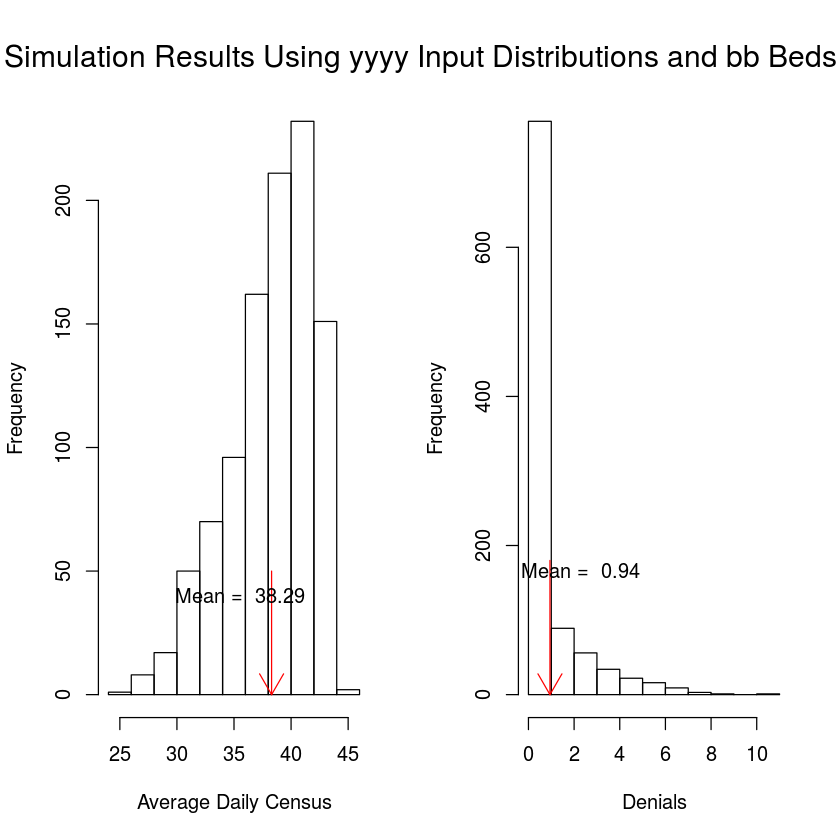

In [17]:
par(mfrow = c(1, 2)) 
hist(adc, xlab = "Average Daily Census", main = "")
arrows(mean(adc), 50, mean(adc), 0, length = 0.2, col = "red")
text(35.5, 40, paste("Mean = ", round(mean(adc),2)))  # Write the mean on the chart.
hist(md, xlab = "Denials", main = "")
arrows(mean(md), 180, mean(md), 0, length = 0.2, col = "red")
text(2.3, 167, paste("Mean = ", round(mean(md),2)))  # Write the mean on the chart.
mtext("Simulation Results Using yyyy Input Distributions and bb Beds", side = 3, line = -3, outer = TRUE, cex = 1.5)